In [7]:
# Open cv library
import cv2

# matplotlib for displaying the images 
from matplotlib import pyplot as plt

img = cv2.imread('a.png')

In [8]:
def printI(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

In [9]:
def pixelate(img, w, h):
    height, width = img.shape[:2]

    # Resize input to "pixelated" size
    temp = cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)

    # Initialize output image
    return cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)

In [10]:
import skimage
from sklearn.cluster import KMeans
from numpy import linalg as LA
import numpy as np

def colorClustering(idx, img, k):
    clusterValues = []
    for _ in range(0, k):
        clusterValues.append([])
    
    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            clusterValues[idx[r][c]].append(img[r][c])

    imgC = np.copy(img)

    clusterAverages = []
    for i in range(0, k):
        clusterAverages.append(np.average(clusterValues[i], axis=0))
    
    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            imgC[r][c] = clusterAverages[idx[r][c]]
            
    return imgC

In [11]:
def segmentImgClrRGB(img, k):
    
    imgC = np.copy(img)
    
    h = img.shape[0]
    w = img.shape[1]
    
    imgC.shape = (img.shape[0] * img.shape[1], 3)
    
    #5. Run k-means on the vectorized responses X to get a vector of labels (the clusters); 
    #  
    kmeans = KMeans(n_clusters=k, random_state=0).fit(imgC).labels_
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    kmeans.shape = (h, w)

    return kmeans

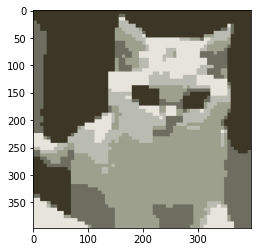

In [14]:
def kMeansImage(image, k):
    idx = segmentImgClrRGB(image, k)
    return colorClustering(idx, image, k)

printI(kMeansImage(pixelate(img, 64, 64), 5))

In [12]:
S